In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import datetime
%matplotlib inline

In [96]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y')

In [97]:
df=pd.read_csv("data.csv", index_col=0, parse_dates=[0], date_parser=parser)

In [98]:
df.head()

,Acidity,Urti,Indigestion,Hypertension,Dehydration,Low BP,Oral ulcer,Anaemia,old abbrassion,Fungal infection,...,Dysentary,Systeric HTN,acute torillitis,follicular torillitis,Burn,Lethargy,Blood Clot,Jaundice,Ankle Twist,Concentrated Urine
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,2,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-06-21,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-06-22,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2018-06-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-06-27,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


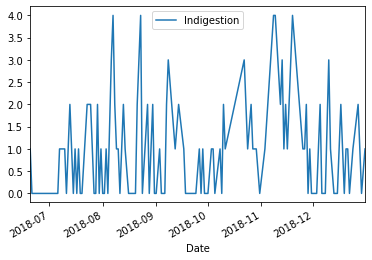

In [99]:
df.plot(y="Indigestion")

In [100]:
##no trend


In [101]:
df.sum().sort_values(ascending=False)

Urti                           317
Cough/Cold                     135
Acidity                        124
Indigestion                    114
Fungal infection                71
Fever                           56
Itching                         30
Oral ulcer                      28
injury/cut                      25
Headache                        16
General weakness                11
Back pain                        9
Running nose                     9
Ring worm                        8
Lethargy                         8
Diarrhoea                        8
Swelling                         7
Giddiness                        6
Dysentary                        6
allergy                          6
Myalgia                          6
Throat pain                      5
Vomitting                        5
Loss of appetite                 5
APD                              5
foot pain                        5
Hypertension                     5
LRTI                             5
vertigo             

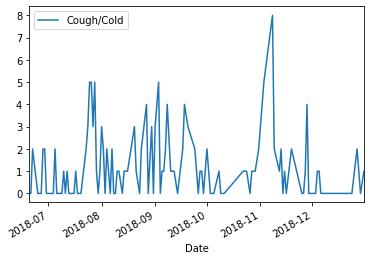

In [102]:
df.plot(y='Cough/Cold')

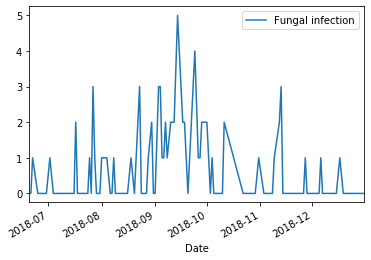

In [103]:
df.plot(y='Fungal infection')

In [104]:
data_indigestion=df['Indigestion']

In [105]:
data_indigestion.head()

Date
2018-06-20    1
2018-06-21    0
2018-06-22    0
2018-06-25    0
2018-06-27    0
Name: Indigestion, dtype: int64

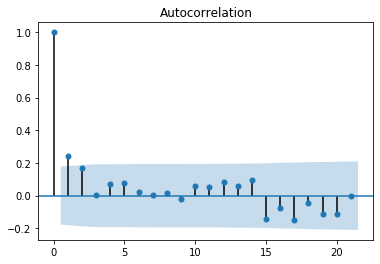

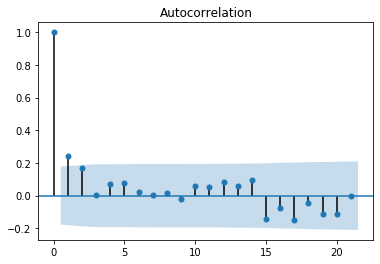

In [106]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_indigestion)

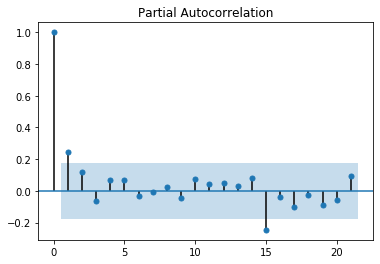

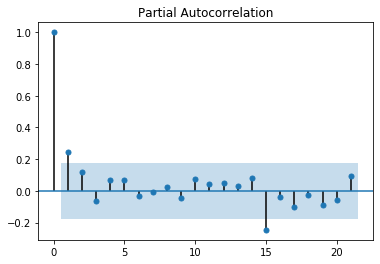

In [107]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_indigestion)

In [108]:
from statsmodels.tsa.arima_model import ARIMA

In [109]:
data_indigestion.index = pd.DatetimeIndex(data_indigestion.index).to_period('D')

In [110]:
data_indigestion.head()

Date
2018-06-20    1
2018-06-21    0
2018-06-22    0
2018-06-25    0
2018-06-27    0
Freq: D, Name: Indigestion, dtype: int64

In [111]:
model=ARIMA(data_indigestion,order=(1,0,1))

In [112]:
model_fit=model.fit(disp=0)

In [113]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Indigestion   No. Observations:                  122
Model:                     ARMA(1, 1)   Log Likelihood                -177.088
Method:                       css-mle   S.D. of innovations              1.033
Date:                Wed, 11 Mar 2020   AIC                            362.177
Time:                        16:28:28   BIC                            373.393
Sample:                    06-20-2018   HQIC                           366.733
                         - 12-31-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9321      0.139      6.683      0.000       0.659       1.206
ar.L1.Indigestion     0.5621      0.273      2.058      0.040       0.027       1.098
ma.L1.Indigestion    -0.3431      0.311     -1.105      0.269      -0.952       0.266
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7789           +0.0000j            1.7789            0.0000
MA.1            2.9149           +0.0000j            2.9149            0.0000
-----------------------------------------------------------------------------
"""

In [114]:
model_fit.forecast()

(array([0.9022693]), array([1.03281994]), array([[-1.12202059,  2.92655919]]))